In [1]:
from omegaconf import OmegaConf
from hydra import initialize, compose

# Initialize Hydra
initialize(config_path="../configs/")

# Compose the configuration
cfg = compose(config_name="collect_cube_sim")

# Convert to dict if needed
cfg_dict = OmegaConf.to_container(cfg, resolve=True)

# Display the config
print(cfg)

{'log': {'log_interval': 10, 'eval_interval': 1000, 'save_interval': 1000, 'dir': 'logdir', 'format_strings': ['stdout']}, 'robot': {'control_hz': 10, 'blocking_control': False, 'DoF': 6, 'gripper': True, 'robot_type': 'panda', 'randomize_ee_on_reset': 0.0, 'pause_after_reset': False, 'qpos': True, 'ee_pos': True, 'imgs': True, 'normalize': False, 'ip_address': None, 'max_path_length': 70, 'camera_model': None, 'camera_names': ['front'], 'camera_resolution': [480, 640], 'calibration_file': 'perception/cameras/calibration/logs/aruco/most_recent_calib.json', 'model_name': 'base_franka', 'on_screen_rendering': False, 'visual_dr': False}, 'env': {'obj_id': 'cube', 'joint_type': 'free', 'obj_pose_init': [0.45, 0.0, 0.02, 0.0, 0.0, 0.0, 1.0], 'obj_rgba': [0.9, 0.0, 0.0, 1.0], 'obj_pose_noise_dict': {'x': {'min': -0.2, 'max': 0.2}, 'y': {'min': -0.2, 'max': 0.2}, 'yaw': {'min': -0.785, 'max': 0.78}}, 'obs_keys': ['lowdim_ee', 'lowdim_qpos', 'obj_pose'], 'safety_penalty': 0.0, 'color_track': '

/tmp/ipykernel_202679/653969863.py:5: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  initialize(config_path="../configs/")
/home/marius/miniforge3/envs/robomimic/lib/python3.8/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'collect_cube_sim': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)


In [16]:
from robot.sim.vec_env.vec_env import make_env
from utils.experiment import hydra_to_dict
import random

cfg.robot.calibration_file = "../perception/cameras/calibration/logs/aruco/most_recent_calib.json"

colors = [
    [0., 0.9, 0., 1.],
    [0.9, 0., 0., 1.],
    [0., 0., 0.9, 1.]
]
color_ids = [0, 1, 2]
random.shuffle(color_ids)

env_cfg_dict = hydra_to_dict(cfg.env)
env_cfg_dict["obj_id"] = "cubes"
env_cfg_dict["obj_rgba"] = colors[color_ids[0]]
env_cfg_dict["reset_data_on_reset"] = False
# env_cfg_dict["obj_pose_init"] = [0.45, 0., 0.02, 0.0, 0.0, 0.0, 1.0]
env = make_env(
        robot_cfg_dict=hydra_to_dict(cfg.robot),
        env_cfg_dict=env_cfg_dict,
        seed=cfg.seed,
        device_id=0,
        verbose=True,
    )

from robot.sim.mujoco.distractor_wrapper import DistWrapper
dis_cfg_dict = hydra_to_dict(cfg.env)
dis_cfg_dict["reset_data_on_reset"] = False
dis_cfg_dict["obj_id"] = "distractor_0"
dis_cfg_dict["obj_rgba"] = colors[color_ids[1]]
# dis_cfg_dict["obj_pose_init"] = [0.45, 0., 0.02, 0.0, 0.0, 0.0, 1.0]
env = DistWrapper(env, **dis_cfg_dict)

dis_cfg_dict = hydra_to_dict(cfg.env)
dis_cfg_dict["obj_id"] = "distractor_1"
dis_cfg_dict["obj_rgba"] = colors[color_ids[2]]
# dis_cfg_dict["obj_pose_init"] = [0.45, 0., 0.02, 0.0, 0.0, 0.0, 1.0]
env = DistWrapper(env, **dis_cfg_dict)

obs = env.reset()

robot config {'control_hz': 10, 'blocking_control': False, 'DoF': 6, 'gripper': True, 'robot_type': 'panda', 'randomize_ee_on_reset': 0.0, 'pause_after_reset': False, 'qpos': True, 'ee_pos': True, 'imgs': True, 'normalize': False, 'ip_address': None, 'max_path_length': 70, 'camera_model': None, 'camera_names': ['front'], 'camera_resolution': [480, 640], 'calibration_file': '../perception/cameras/calibration/logs/aruco/most_recent_calib.json', 'model_name': 'base_franka', 'on_screen_rendering': False, 'visual_dr': False}


Object pose: [0.425034884505077, 0.15670920031283192, 0.02, 0.9353439759343385, 0.0, -0.0, 0.3537395181250514] - seed 0
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.5         0.05        0.02
  1.          0.          0.          0.          0.46795327 -0.03053808
  0.02        0.99363219  0.         -0.          0.11267237  0.4695254
  0.08607575  0.02        0.9968683   0.         -0.          0.07907969]


Object pose: [0.2973097703475733, 0.05596840853100954, 0.02, 0.9609652807489141, 0.0, 0.0, -0.27666898849556815] - seed 0
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.5         0.05        0.02
  1.          0.          0.          0.          0.56966343 -0.01540826
  0.02        0.97627481  0.         -0.          0.21653522  0.5612627
  0.14800486  0.02        0.9311403   0.         -0.          0.36466114]


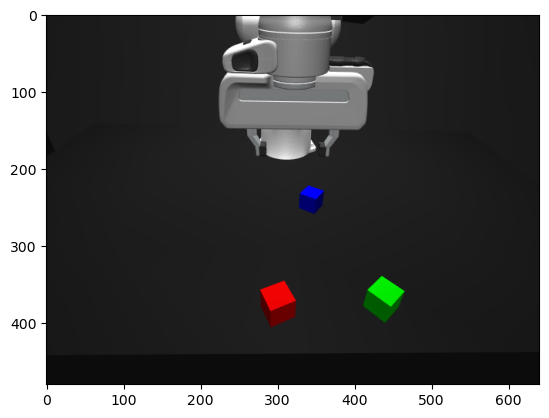

In [18]:
import matplotlib.pyplot as plt
obs = env.reset()
plt.imshow(obs["front_rgb"])